# Data Cleansing :: Feature scaling

### Feature scaling
>- 두 변수중 하나의 값의 크기가 너무 크다?
ex) 몸무게와 키가 변수일 때, 키가 영향을 많이 줌
>- feature간의 최대-최소값의 차이를 맞춘다!
> 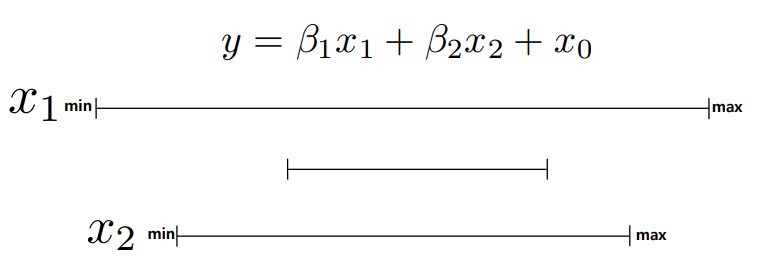

In [1]:
# code from - https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

import pandas as pd
import numpy as np

df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


### Feature scaling 전략
>- ##### Min-Max Normalization<br/>
    기존 변수 범위를 **새로운 최대-최소로 변경**<br/>
    일반적으로 **0과 1 사이 값으로 변경함**
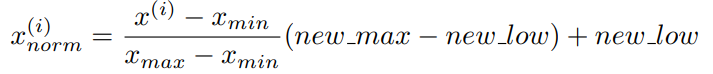

>- ##### Standardization (Z-score Normalization)<br/>
    기존 변수 범위를 정규 분포로 변환<br/>
    **실제 min-max의 값을 모를 때 활용 가능**
    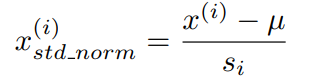
    
>- ##### 주의사항<br/>
    실제 사용할 때는 반드시 정규화 parameter를 기억하여 새로운 값에 적용해야 함

***Min-Max Normalization***


In [2]:
df["A"] = ( df["A"] - df["A"].min() )  \
/ (df["A"].max() - df["A"].min()) * (5 - 1) + 1
df

,A,B,C
0,1.000000,103.02,big
1,4.704874,107.26,small
2,4.741339,110.35,big
3,5.000000,114.23,small
4,4.753981,114.68,small


***Z-score Normalization***

In [3]:
df["B"] = ( df["B"] - df["B"].mean() )  \
/ (df["B"].std() )
df

,A,B,C
0,1.000000,-1.405250,big
1,4.704874,-0.540230,small
2,4.741339,0.090174,big
3,5.000000,0.881749,small
4,4.753981,0.973556,small


### Feature Scaling Function

In [4]:
def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

### Feature Scaling with sklearn
>- Label encoder와 마찬가지로, sklearn도 feature scale 지원
>- MinMaxScaler와 StandardScaler 사용

In [5]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [6]:
feture_scaling(df,column=["A","B"])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


***

In [7]:
# code from - http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [8]:
df = feture_scaling(df, "min-max", column=['Alcohol', 'Malic acid'])
df.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


In [9]:
from sklearn import preprocessing

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [10]:
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])

In [11]:
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])

In [12]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [13]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])

In [14]:
minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

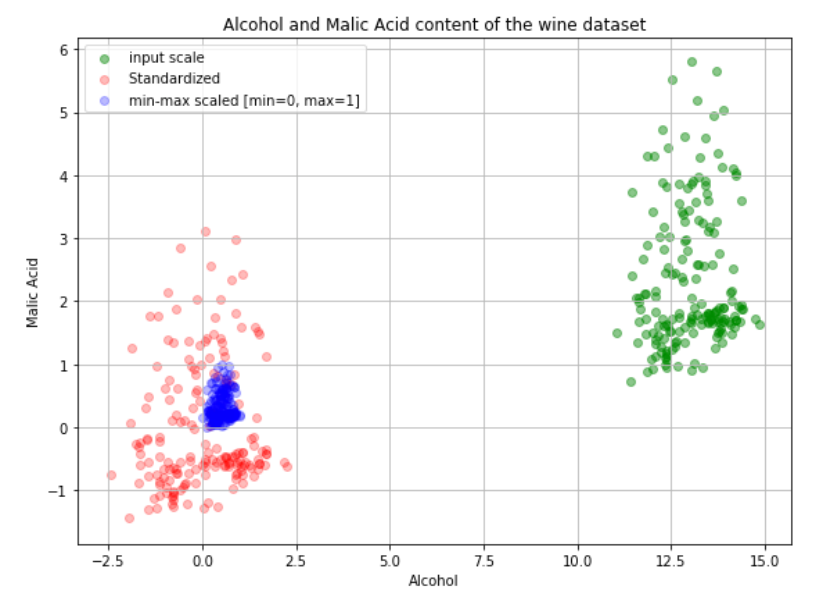

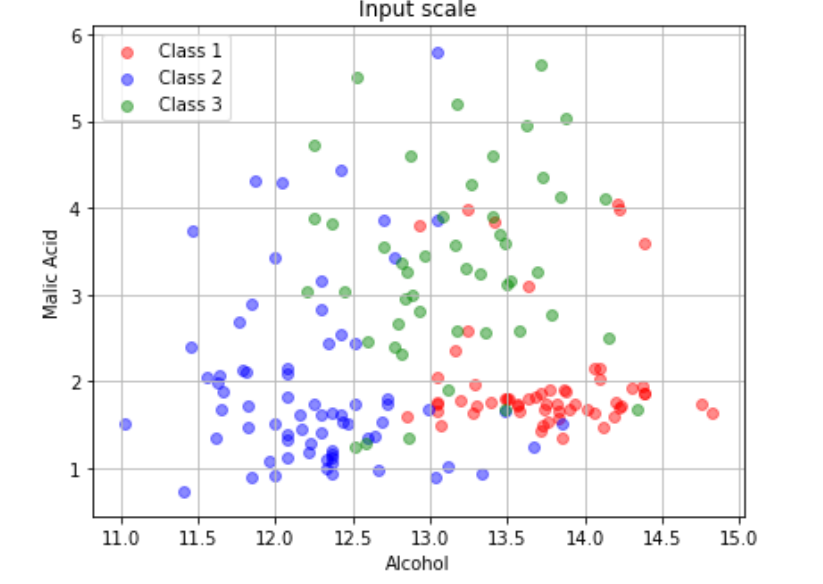

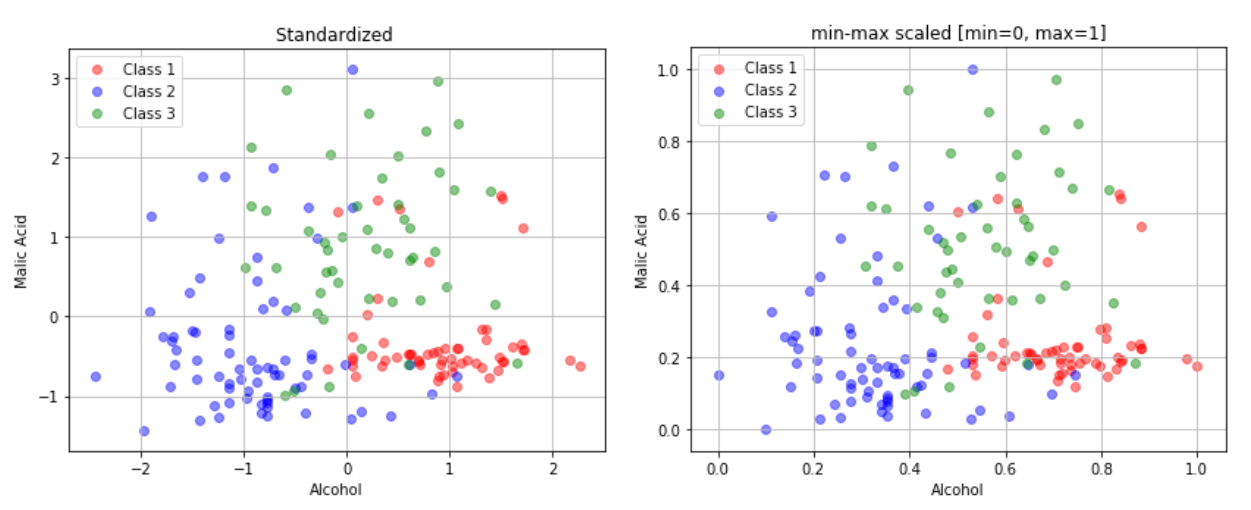